# Problem 1

(1000, 2)
(1000,)


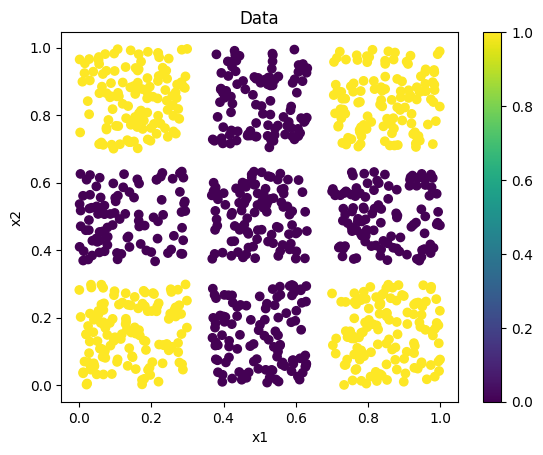

In [19]:
import numpy as np

# Load data
data = np.loadtxt('hw1data.dat')
X = data[:,:2]
y = (data[:,2] + 1) / 2 # Converting labels from -1/1 to 0/1

print(X.shape)
print(y.shape)

# Plot data
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data')
# label y's color
plt.colorbar()
plt.show()


In the above code, I loaded the data from the file `data.csv` into a numpy list. By observing the shape of the data, I found that the data is a 2D array with 100 rows and 2 columns, which I called x1 and x2. And I used a vector X to store them. For the labels, I used a vector Y to store them, after transforming them from -1 and 1 to 0 and 1 for the convenience of binary classification according to the requirement. 

To better understand the data, I plotted the data points and and their labels in the figure above. Note that yellow means label 1 and purple regards to label 0, as indicated in the color bar aside. From the figure, we can see that the data points are distributed in nine clusters. The clusters at the four corners are labeled 1, while the rest are labeled 0.

From the figure, we can see that the correct label for [0.8, 0.2] should be 1.

In [26]:
import tensorflow as tf
from tensorflow import keras

def train_model(optimizer, activation, X, y, epochs=1000, batch_size=64):
    # Create a sequential model
    model = keras.Sequential([
        # Create an input layer with 2 input units
        keras.layers.Input(shape=(2,)),
        # Create a fully connected layer with 5 hidden units and customized activation, and Glorot uniform initializer, and zero bias initializer
        keras.layers.Dense(5, activation=activation, kernel_initializer=keras.initializers.GlorotUniform(seed=99), bias_initializer='zeros'),
        # Create a fully connected layer with 1 hidden unit and sigmoid activation, and Glorot uniform initializer, and zero bias initializer
        keras.layers.Dense(1, activation='sigmoid', kernel_initializer=keras.initializers.GlorotUniform(seed=99), bias_initializer='zeros')
    ])
    # Compile the model with binary crossentropy loss and accuracy metric, and the optimizer passed in
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    # Define the EarlyStopping callback
    # early_stop = keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
    # Train the model
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=0, callbacks=[])
    return model, history


In above code, I defined a trian_model function, which will accept a training set, a optimizer, an activation function as input, and return a compiled sequential model, which has one input layer, one hidden dense layer with specificied activation function, and one dense output layer as stated in the assignment requirement. The model will be compiled with the specificied optimizer, and set accuracy as one of the metrics before return the model. The batch size was set to be 64 by trading off between the training time and the accuracy.

1/1 [==============================] - 0s 31ms/step
SGD, momentum=0.0: loss = 0.6928750276565552, accuracy = 0.5830000042915344, predict on [0.8, 0.2] = [[0.49882838]]
1/1 [==============================] - 0s 31ms/step
SGD, momentum=0.1: loss = 0.6928249001502991, accuracy = 0.6060000061988831, predict on [0.8, 0.2] = [[0.49890974]]
1/1 [==============================] - 0s 39ms/step
SGD, momentum=0.5: loss = 0.6921793222427368, accuracy = 0.5270000100135803, predict on [0.8, 0.2] = [[0.49555615]]
1/1 [==============================] - 0s 33ms/step
SGD, momentum=0.9: loss = 0.4370908737182617, accuracy = 0.7710000276565552, predict on [0.8, 0.2] = [[0.78126603]]


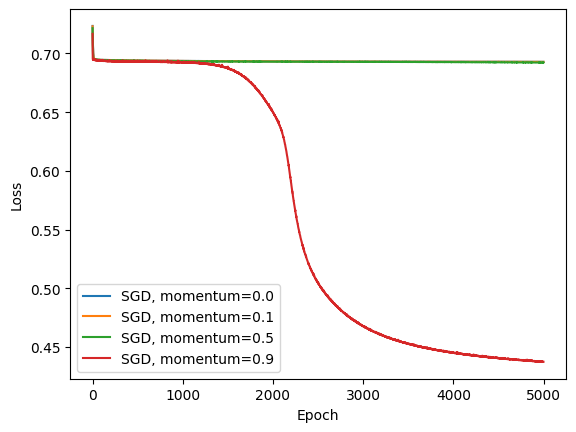

In [30]:

SGD_configs = [
    {"learning_rate": 0.01, "momentum": m} for m in [0.0, 0.1, 0.5, 0.9]
]

for config in SGD_configs:
    # Create a SGD optimizer with the config
    optimizer = keras.optimizers.SGD(**config)
    # Create a model with the optimizer
    model, history = train_model(optimizer, 'sigmoid', X, y, epochs=5000, batch_size=64)
    # Plot the loss curve
    plt.plot(history.history['loss'], label='SGD, momentum={}'.format(config['momentum']))
    # Evaluate the model
    loss, accuracy = model.evaluate(X, y, verbose=0)
    print('SGD, momentum={}: loss = {}, accuracy = {}, predict on [0.8, 0.2] = {}'.format(config['momentum'], loss, accuracy, model.predict(np.array([[0.8, 0.2]]))))

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


| Optimizer                                  | Activation function | Required epochs | Training accuracy (%) | Prediction for [0.8, 0.2] |
|--------------------------------------------|---------------------|-----------------|-----------------------|---------------------------|
| SGD (Learning rate = 0.01, Momentum = 0.0) | Sigmoid             |      <100       |           58          |            0              |
| SGD (Learning rate = 0.01, Momentum = 0.1) | Sigmoid             |      <100       |           61          |            0              |
| SGD (Learning rate = 0.01, Momentum = 0.5) | Sigmoid             |      <100       |           53          |            0              |
| SGD (Learning rate = 0.01, Momentum = 0.9) | Sigmoid             |      >5000      |           77          |            1              |


To expore the effect of different momentum, I fixed the learning rate to be 0.01, the activation function to be sigmoid, the epoch to be 5000, and changed the momentum to 0.0, 0.1, 0.5, 0.9 respectively. The results are shown in the table above. From the table, we can see that the momentum has a significant effect on the training accuracy. When the momentum is 0.0, 0.1, 0.5, the training accuracy is around 60%, while when the momentum is 0.9, the training accuracy is 77%. With the momentum 0.0, 0.1, 0.5, the model predict the label of [0.8, 0.2] to be 0, which is wrong, while with the momentum 0.9, the model predict the label of [0.8, 0.2] to be 1, which is correct.

It can also be noticed that the model with momentum 0.0, 0.1, 0.5 converged quickly (less than 100 epochs) at a relatively higher loss, while the model with momentum 0.9 took more than 5000 epochs to converge at a much better accuracy. Interestingly, the model with momentum 0.9 behavior like the other three model before 1000 epochs, and then it started to converge at a much better accuracy. This may because the momentum 0.9 help the model to escape from the local minimum and find the global minimum, thus the model can converge at a much better accuracy.

1/1 [==============================] - 0s 28ms/step
SGD, activation=sigmoid: loss = 0.4282628297805786, accuracy = 0.7799999713897705, predict on [0.8, 0.2] = [[0.76898795]]
1/1 [==============================] - 0s 44ms/step
SGD, activation=tanh: loss = 0.025120960548520088, accuracy = 0.9940000176429749, predict on [0.8, 0.2] = [[1.]]
1/1 [==============================] - 0s 31ms/step
SGD, activation=relu: loss = 0.20816543698310852, accuracy = 0.8920000195503235, predict on [0.8, 0.2] = [[0.8016232]]


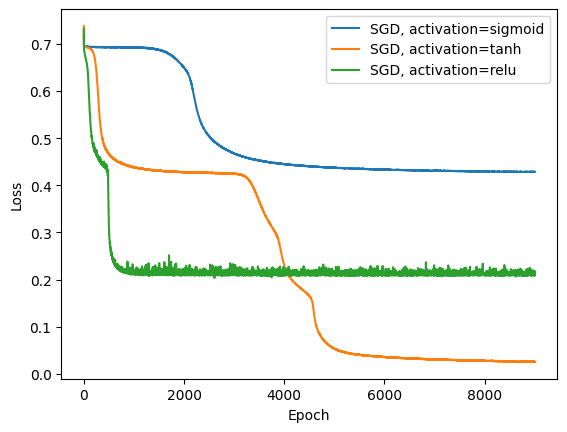

In [29]:

activations = ['sigmoid', 'tanh', 'relu']

for a in activations:
    # Create a SGD optimizer
    optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
    # Create a model with the activation
    model, history = train_model(optimizer, a, X, y, epochs=9000, batch_size=64)
    # Plot the loss curve
    plt.plot(history.history['loss'], label='SGD, activation={}'.format(a))
    # Evaluate the model
    loss, accuracy = model.evaluate(X, y, verbose=0)
    print('SGD, activation={}: loss = {}, accuracy = {}, predict on [0.8, 0.2] = {}'.format(a, loss, accuracy, model.predict(np.array([[0.8, 0.2]]))))


plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

| Optimizer                                  | Activation function | Required epochs | Training accuracy (%) | Prediction for [0.8, 0.2] |
|--------------------------------------------|---------------------|-----------------|-----------------------|---------------------------|
| SGD (Learning rate = 0.01, Momentum = 0.9) | ReLU                |       1000      |          89           |             1             |
| SGD (Learning rate = 0.01, Momentum = 0.9) | Tanh                |       7000      |          99           |             1             |
| SGD (Learning rate = 0.01, Momentum = 0.9) | Sigmoid             |       5000      |          78           |             1             |

After chosed the best momentum value 0.9, we fixed this value and changed the activation function to ReLU, Tanh, and Sigmoid respectively. The results are shown in the table above. From the table, we can see that the activation function has a significant effect on the training accuracy. When the activation function is ReLU, Tanh, Sigmoid, the training accuracy is 89%, 99%, 78% respectively. The model with all three activation function predict the label of [0.8, 0.2] to be 1, which is correct.

It can also be noticed that ReLU converged fastest, then sigmoid, and the tanh is the slowest. As for the accuracy, ReLU is the lowest, then sigmoid, and the tanh is the highest. This may because the ReLU is not differentiable at 0, which may cause the model to stuck at a local minimum. This may also explain why the model with ReLU shake after convergence. 

1/1 [==============================] - 0s 39ms/step
RMSprop, learning_rate=0.0001: loss = 0.5976850390434265, accuracy = 0.7099999785423279, predict on [0.8, 0.2] = [[0.5663247]]
1/1 [==============================] - 0s 29ms/step
RMSprop, learning_rate=0.001: loss = 0.3118937015533447, accuracy = 0.8489999771118164, predict on [0.8, 0.2] = [[0.96785754]]
1/1 [==============================] - 0s 33ms/step
RMSprop, learning_rate=0.01: loss = 1.954366234713234e-05, accuracy = 1.0, predict on [0.8, 0.2] = [[1.]]


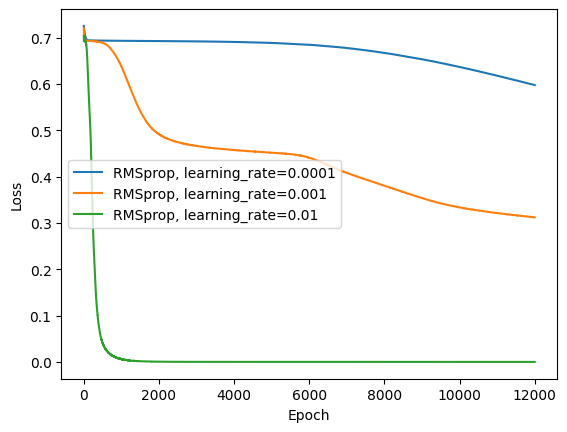

In [32]:

RMSprop_configs = [
    {"learning_rate": lr, "epsilon": 1e-6} for lr in [0.0001, 0.001, 0.01]
]

for config in RMSprop_configs:
    # Create a RMSprop optimizer with the config
    optimizer = keras.optimizers.RMSprop(**config)
    # Create a model with the optimizer
    model, history = train_model(optimizer, 'sigmoid', X, y, epochs=12000, batch_size=64)
    # Plot the loss curve
    plt.plot(history.history['loss'], label='RMSprop, learning_rate={}'.format(config['learning_rate']))
    # Evaluate the model
    loss, accuracy = model.evaluate(X, y, verbose=0)
    print('RMSprop, learning_rate={}: loss = {}, accuracy = {}, predict on [0.8, 0.2] = {}'.format(config['learning_rate'], loss, accuracy, model.predict(np.array([[0.8, 0.2]]))))

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


| Optimizer                                  | Activation function | Required epochs | Training accuracy (%) | Prediction for [0.8, 0.2] |
|--------------------------------------------|---------------------|-----------------|-----------------------|---------------------------|
| RMSprop (Learning rate = 0.0001)           | Sigmoid             |      >12000     |   71 at 12000 epoch   |             1             |
| RMSprop (Learning rate = 0.001)            | Sigmoid             |      >12000     |   85 at 12000 epoch   |             1             |
| RMSprop (Learning rate = 0.01)             | Sigmoid             |       1500      |        100            |             1             |


To expore which learning rate is the best for RMSprop, I fixed the activation functoin to be sigmoid and the epoch to be 12000, and changed learning rate from 0.0001, to 0.001, and 0.01. From the table above, we can see that the larger the learning rate, the faster the model converge. Since the model with learning rate 0.01 converged fastest and has a 100% training accuracy, I chose this learning rate for the following experiments.

1/1 [==============================] - 0s 36ms/step
RMSprop, activation=sigmoid: loss = 3.194100281689316e-05, accuracy = 1.0, predict on [0.8, 0.2] = [[0.99999994]]
1/1 [==============================] - 0s 39ms/step
RMSprop, activation=tanh: loss = 0.007663054391741753, accuracy = 0.996999979019165, predict on [0.8, 0.2] = [[1.]]
1/1 [==============================] - 0s 39ms/step
RMSprop, activation=relu: loss = 0.2091357409954071, accuracy = 0.9010000228881836, predict on [0.8, 0.2] = [[0.7383499]]


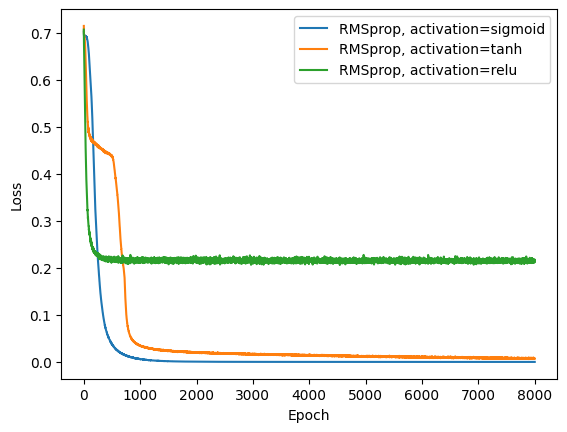

In [33]:

activations = ['sigmoid', 'tanh', 'relu']

for a in activations:
    # Create a RMSprop optimizer
    optimizer = keras.optimizers.RMSprop(learning_rate=0.01, epsilon=1e-6)
    # Create a model with the activation
    model, history = train_model(optimizer, a, X, y, epochs=8000, batch_size=64)
    # Plot the loss curve
    plt.plot(history.history['loss'], label='RMSprop, activation={}'.format(a))
    # Evaluate the model
    loss, accuracy = model.evaluate(X, y, verbose=0)
    print('RMSprop, activation={}: loss = {}, accuracy = {}, predict on [0.8, 0.2] = {}'.format(a, loss, accuracy, model.predict(np.array([[0.8, 0.2]]))))

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

| Optimizer                                  | Activation function | Required epochs | Training accuracy (%) | Prediction for [0.8, 0.2] |
|--------------------------------------------|---------------------|-----------------|-----------------------|---------------------------|
| RMSprop (Learning rate = 0.01)             | ReLU                |       500       |          90           |           1               |
| RMSprop (Learning rate = 0.01)             | Tanh                |       2000      |          99.6         |           1               |
| RMSprop (Learning rate = 0.01)             | Sigmoid             |       1000      |          100          |           1               |

Fixed learning rate to be 0.01, I changed the activation function to ReLU, Tanh, and Sigmoid respectively. The results are shown in the table above. From the table, we can see that the activation function has a significant effect on the training accuracy. When the activation function is ReLU, Tanh, Sigmoid, the training accuracy is 90%, 99.6%, 100% respectively. The model with all three activation function predict the label of [0.8, 0.2] to be 1, which is correct.

It can be noticed that ReLU converged fastest, but has the lowest accuracy. The sigmoid converged second faster, and has accuracy near 100%. The tanh is the slowest, and has no significant improvement on accuracy compared to sigmoid, thus not recommended.

1/1 [==============================] - 0s 27ms/step
Adam, beta_1=0.85, beta_2=0.95: loss = 0.0006431108340620995, accuracy = 1.0, predict on [0.8, 0.2] = [[0.99996394]]
1/1 [==============================] - 0s 31ms/step
Adam, beta_1=0.85, beta_2=0.99: loss = 0.000561863649636507, accuracy = 1.0, predict on [0.8, 0.2] = [[0.99996984]]
1/1 [==============================] - 0s 29ms/step
Adam, beta_1=0.9, beta_2=0.95: loss = 0.00048618842265568674, accuracy = 1.0, predict on [0.8, 0.2] = [[0.99999094]]
1/1 [==============================] - 0s 28ms/step
Adam, beta_1=0.9, beta_2=0.99: loss = 0.0005452478071674705, accuracy = 1.0, predict on [0.8, 0.2] = [[0.9999717]]


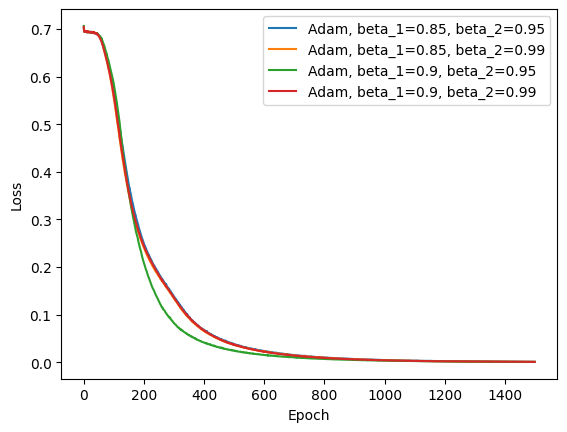

In [35]:

Adam_configs = [
    {"learning_rate": 0.01, "beta_1": b1, "beta_2": b2} for b1 in [0.85, 0.9] for b2 in [0.95, 0.99]
]

for config in Adam_configs:
    # Create a Adam optimizer with the config
    optimizer = keras.optimizers.Adam(**config)
    # Create a model with the optimizer
    model, history = train_model(optimizer, 'sigmoid', X, y, epochs=1500, batch_size=64)
    # Plot the loss curve
    plt.plot(history.history['loss'], label='Adam, beta_1={}, beta_2={}'.format(config['beta_1'], config['beta_2']))
    # Evaluate the model
    loss, accuracy = model.evaluate(X, y, verbose=0)
    print('Adam, beta_1={}, beta_2={}: loss = {}, accuracy = {}, predict on [0.8, 0.2] = {}'.format(config['beta_1'], config['beta_2'], loss, accuracy, model.predict(np.array([[0.8, 0.2]]))))

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

| Optimizer                                  | Activation function | Required epochs | Training accuracy (%) | Prediction for [0.8, 0.2] |
|--------------------------------------------|---------------------|-----------------|-----------------------|---------------------------|
| ADAM (β1=0.85, β2=0.95)                    | Sigmoid             |       800       |          100          |             1             |
| ADAM (β1=0.85, β2=0.99)                    | Sigmoid             |       800       |          100          |             1             |
| ADAM (β1=0.9, β2=0.95)                     | Sigmoid             |       700       |          100          |             1             |
| ADAM (β1=0.9, β2=0.99)                     | Sigmoid             |       800       |          100          |             1             |

To expore the effect of different β1 and β2, I fixed the activation function to be sigmoid, the learning rate to be 0.01, and the epoch to be 1500, and changed β1 to 0.85, 0.9 and β2 to 0.9, 0.99 respectively. From the table above, we can see that the different β1 and β2 has no significant effect on the training accuracy. All the models converged at 800 epochs with 100% training accuracy. All the models predict the label of [0.8, 0.2] to be 1, which is correct.

It can be noticed that the model with β1=0.9, β2=0.95 converged a little faster than the other three models, while the other three models converged nearly at the same epoch. Thus, I chose β1=0.9, β2=0.95 for the following experiments.

1/1 [==============================] - 0s 26ms/step
Adam, activation=sigmoid: loss = 0.0005479938117787242, accuracy = 1.0, predict on [0.8, 0.2] = [[0.999971]]
1/1 [==============================] - 0s 31ms/step
Adam, activation=tanh: loss = 2.403072130618966e-06, accuracy = 1.0, predict on [0.8, 0.2] = [[0.99999994]]
1/1 [==============================] - 0s 30ms/step
Adam, activation=relu: loss = 0.2185967117547989, accuracy = 0.8870000243186951, predict on [0.8, 0.2] = [[0.84810805]]


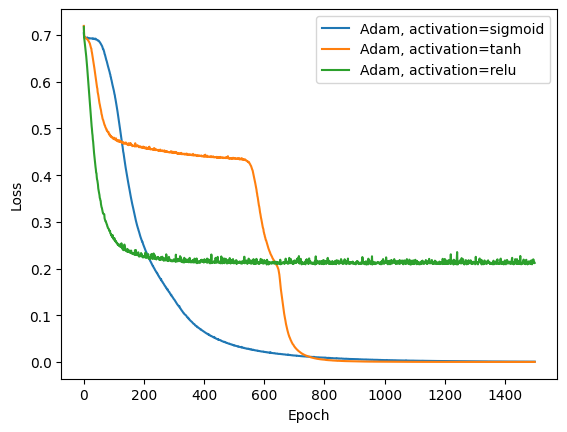

In [36]:

activations = ['sigmoid', 'tanh', 'relu']

for a in activations:
    # Create a Adam optimizer
    optimizer = keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.95)
    # Create a model with the activation
    model, history = train_model(optimizer, a, X, y, epochs=1500, batch_size=64)
    # Plot the loss curve
    plt.plot(history.history['loss'], label='Adam, activation={}'.format(a))
    # Evaluate the model
    loss, accuracy = model.evaluate(X, y, verbose=0)
    print('Adam, activation={}: loss = {}, accuracy = {}, predict on [0.8, 0.2] = {}'.format(a, loss, accuracy, model.predict(np.array([[0.8, 0.2]]))))

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

| Optimizer                                  | Activation function | Required epochs | Training accuracy (%) | Prediction for [0.8, 0.2] |
|--------------------------------------------|---------------------|-----------------|-----------------------|---------------------------|
| ADAM (β1=0.9, β2=0.95)                     | ReLU                |      300        |         89            |            1              |
| ADAM (β1=0.9, β2=0.95)                     | Tanh                |      800        |         100           |            1              |
| ADAM (β1=0.9, β2=0.95)                     | Sigmoid             |     1000        |         100           |            1              |

Fixed β1=0.9, β2=0.95, I changed the activation function to ReLU, Tanh, and Sigmoid respectively. The results are shown in the table above. From the table, we can see that the activation function has a significant effect on the training accuracy. When the activation function is ReLU, Tanh, Sigmoid, the training accuracy is 89%, 100%, 100% respectively. The model with all three activation function predict the label of [0.8, 0.2] to be 1, which is correct.

We can noticed that the model with ReLU converged fastest, but has the lowest accuracy. The model with Tanh and sigmoid converged has nearly 100 accuracy, but they converged at a much slower speed. 


### Discussion and conclusion

To conclude, the best model is the model with ADAM optimizer, β1=0.9, β2=0.95, learning rate=0.01, sigmoid activation function, which converged fast, and achieve a high accuracy. RMSprop optimizer also performed well, but it is a little slower than ADAM. SGD optimizer performed worst, and it is also the slowest.

It can be noticed that, momentum has a significant effect on the accuracy of SGD, too small momentum may cause the model to stuck at a local minimum. Besides, ReLU converged faster, but has lower accuracy and may cause shake after convergence. The tanh has similar performance as sigmoid, but it often has plateaus at the middle of the training process, which may cause problem if we want to use some early stopping strategy. The larger the learning rate, the faster the model converge, but it may cause the model to stuck at a local minimum.

Overall, for optimization, ADAM seems to be the best choice, and for activation function, use sigmoid for best accuracy, and ReLU for fastest convergence.



# Problem 2



step: 1, epoch: 1, X: [1 3], y: 1, w: [0 0], predict: 0, isWrong: True
step: 2, epoch: 1, X: [-1  4], y: -1, w: [1 3], predict: 1, isWrong: True
step: 3, epoch: 2, X: [1 3], y: 1, w: [ 2 -1], predict: -1, isWrong: True
step: 4, epoch: 2, X: [-1  4], y: -1, w: [3 2], predict: 1, isWrong: True
step: 5, epoch: 3, X: [1 3], y: 1, w: [ 4 -2], predict: -1, isWrong: True
step: 6, epoch: 3, X: [-1  4], y: -1, w: [5 1], predict: -1, isWrong: False
step: 7, epoch: 4, X: [1 3], y: 1, w: [5 1], predict: 1, isWrong: False
step: 8, epoch: 4, X: [-1  4], y: -1, w: [5 1], predict: -1, isWrong: False


final w: [5 1]
iter_count: 5
hyperplane equation: 5*x1 + 1*x2 = 0


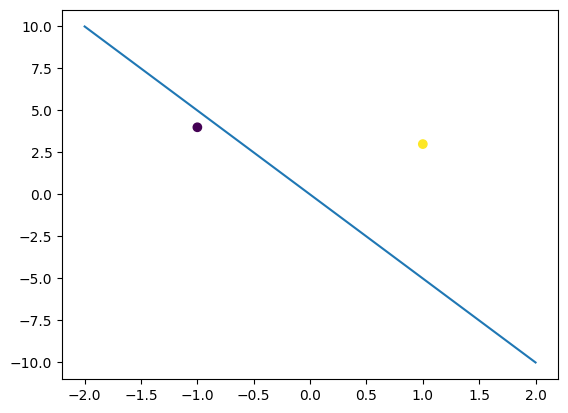

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# data
X = np.array([[1, 3], [-1, 4]])
y = np.array([1, -1])

# initialize
w = np.array([0, 0])
iter_count = 0
epoch = 0
step = 0

# predict function
def predict(x, w):
    return np.sign(np.dot(w, x))

# train
converged = False
while not converged:
    epoch += 1
    converged = True
    for i in range(len(X)):
        step += 1
        print('step: {}, epoch: {}, X: {}, y: {}, w: {}, predict: {}, isWrong: {}'.format(step, epoch, X[i], y[i], w, predict(X[i], w), y[i] * predict(X[i], w) <= 0))
        if y[i] * predict(X[i], w) <= 0:
            w += y[i] * X[i]
            converged = False
            iter_count += 1


print('\n')
print('final w: {}'.format(w))
print('iter_count: {}'.format(iter_count))
print('hyperplane equation: {}*x1 + {}*x2 = 0'.format(w[0], w[1]))

# plot
plt.scatter(X[:, 0], X[:, 1], c=y)
# plot hyperplane
x = np.linspace(-2, 2, 99)
y = -w[0] / w[1] * x
plt.plot(x, y)
plt.show()
